In [38]:
import pandas as pd
from sportsipy.nfl.teams import Teams
from sportsipy.nfl.teams import Schedule
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.animation import FuncAnimation, writers
import matplotlib as mpl

In [41]:
name_and_abbr = {"Name" : [], "Abbr" : []}
for team in Teams():
    name_and_abbr["Name"].append(team.name)
    name_and_abbr["Abbr"].append(team.abbreviation)

divisions = {"AFCW" : ["KAN", "RAI", "SDG", "DEN"], "AFCN" : ["PIT", "CIN", "RAV", "CLE"], "AFCS" : ["OTI", "HTX", "CLT", "JAX"],
            "AFCE" : ["BUF", "NWE", "NYJ", "MIA"], "NFCW" : ["SEA", "SFO", "RAM", "CRD"], "NFCN" : ["GNB", "MIN", "DET", "CHI"],
            "NFCS" : ["ATL", "NOR", "CAR", "TAM"], "NFCE" : ["DAL", "NYG", "WAS", "PHI"]}

In [42]:
results = {}
for team in Teams():
    results[team.abbreviation] = {}
    
    #find team rivals
    rivals = []
    teamindex = {i for i in divisions if team.abbreviation in divisions[i]}
    for division_member in divisions[teamindex.pop()]:
        if division_member != team.abbreviation:
            rivals.append(division_member)
    for rival in rivals:
        results[team.abbreviation][rival] = [0, 0]
    for year in range(2015, 2022):
        for rival in rivals:
            for game in Schedule(team.abbreviation, year):
                if game.opponent_abbr == rival:
                    if game.result == "Win":
                        results[team.abbreviation][rival][0] = results[team.abbreviation][rival][0] + 1
                    results[team.abbreviation][rival][1] += 1

In [43]:
records = {"Rivalry" : [], "Rivalry_Abbr" : [], "Wins" : [], "Losses" : []}
#find the top 10 values. How do I want to present this data? Animation oooh with the team logos
#how do we store this data? How about just team + " vs. " + "rival"
for team in results:
    for rival in results[team]:
        if (results[team][rival][0] / results[team][rival][1]) > 0.75:
            team_name = name_and_abbr["Name"][name_and_abbr["Abbr"].index(team)]
            rival_name = name_and_abbr["Name"][name_and_abbr["Abbr"].index(rival)]
            records["Rivalry"].append(team_name + " vs. " + rival_name + " since 2015")
            records["Rivalry_Abbr"].append(team + " vs. " + rival)
            records["Wins"].append(results[team][rival][0])
            records["Losses"].append(results[team][rival][1] - results[team][rival][0])
            #records[team_name + " vs. " + rival_name + " since 2015"] = (results[team][rival][0], results[team][rival][1] - results[team][rival][0])
df = pd.DataFrame(records)
df.sort_values("Wins", ascending = False, inplace = True)
df.reset_index(drop = True, inplace = True)
print(df)

                                              Rivalry Rivalry_Abbr  Wins  \
0    Kansas City Chiefs vs. Denver Broncos since 2015  KAN vs. DEN    13   
1   New England Patriots vs. New York Jets since 2015  NWE vs. NYJ    13   
2   Kansas City Chiefs vs. Las Vegas Raiders since...  KAN vs. RAI    12   
3   Seattle Seahawks vs. San Francisco 49ers since...  SEA vs. SFO    12   
4      Green Bay Packers vs. Chicago Bears since 2015  GNB vs. CHI    12   
5   Los Angeles Rams vs. Arizona Cardinals since 2015  RAM vs. CRD    12   
6   Houston Texans vs. Jacksonville Jaguars since ...  HTX vs. JAX    12   
7   Kansas City Chiefs vs. Los Angeles Chargers si...  KAN vs. SDG    11   
8         Buffalo Bills vs. Miami Dolphins since 2015  BUF vs. MIA    11   
9   Philadelphia Eagles vs. New York Giants since ...  PHI vs. NYG    11   
10  Arizona Cardinals vs. San Francisco 49ers sinc...  CRD vs. SFO    11   
11  Tennessee Titans vs. Jacksonville Jaguars sinc...  OTI vs. JAX    11   

    Losses 

MovieWriter ffmpeg unavailable; using Pillow instead.


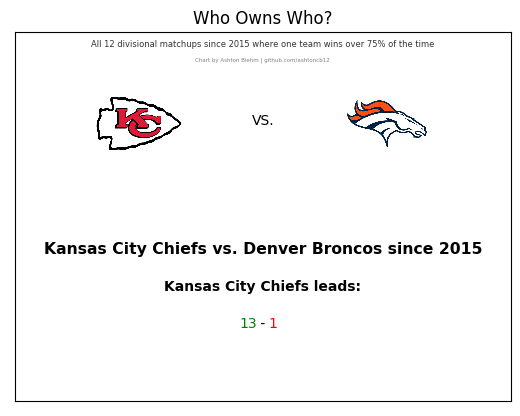

In [44]:
fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.set_title("Who Owns Who?")
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.set_xticklabels(())
    ax.set_yticklabels(())
    ax.set_yticks(())
    ax.set_xticks(())
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.text(2.5, 4.6, "Chart by Ashton Blehm | github.com/ashtoncb12", size = 4, alpha = 0.5, horizontalalignment = "center")
    ax.text(2.5, 4.8, "All 12 divisional matchups since 2015 where one team wins over 75% of the time", size = 6, alpha = 0.8, horizontalalignment = "center")
    ax.text(2.5, 2, df["Rivalry"][i], horizontalalignment = "center", weight = 'semibold', size = 11.25)
    ax.text(2.5, 3.75, "VS.", size = 10, horizontalalignment = "center")

    team1 = df["Rivalry_Abbr"][i][:3]
    team2 = df["Rivalry_Abbr"][i][-3:]
    
    ax.text(2.5, 1.5, "" + name_and_abbr["Name"][name_and_abbr["Abbr"].index(team1)] +
                                          " leads:", horizontalalignment = 'center', weight = 'semibold', size = 10)
    ax.text(2.35, 1, str(df["Wins"][i]), horizontalalignment = "center", color = "green")
    ax.text(2.5, 1, " - ", horizontalalignment = "center")
    ax.text(2.6, 1, str(df["Losses"][i]), horizontalalignment = "center", color = "red")

    img = plt.imread(team1 + ".png")
    imagebox = OffsetImage(img, zoom = 0.09)
    ab = AnnotationBbox(imagebox, [1.25, 3.75], frameon = False)
    ax.add_artist(ab)
    
    img2 = plt.imread(team2 + ".png")
    imagebox2 = OffsetImage(img2, zoom = 0.09)
    ab2 = AnnotationBbox(imagebox2, [3.75, 3.75], frameon = False)
    ax.add_artist(ab2)

ani = FuncAnimation(fig, animate, frames = 12, interval = 4000, repeat = True)
ani.save("Who Owns Who.gif", dpi = 500)